In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("ifood_df.csv")

In [3]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
data.drop_duplicates(inplace = True)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2021 non-null   int64
 1   Kidhome               2021 non-null   int64
 2   Teenhome              2021 non-null   int64
 3   Recency               2021 non-null   int64
 4   MntWines              2021 non-null   int64
 5   MntFruits             2021 non-null   int64
 6   MntMeatProducts       2021 non-null   int64
 7   MntFishProducts       2021 non-null   int64
 8   MntSweetProducts      2021 non-null   int64
 9   MntGoldProds          2021 non-null   int64
 10  NumDealsPurchases     2021 non-null   int64
 11  NumWebPurchases       2021 non-null   int64
 12  NumCatalogPurchases   2021 non-null   int64
 13  NumStorePurchases     2021 non-null   int64
 14  NumWebVisitsMonth     2021 non-null   int64
 15  AcceptedCmp3          2021 non-null   int64
 16  AcceptedCmp

In [7]:
data = data.drop(columns = ['Z_CostContact', 'Z_Revenue'])

In [8]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


In [9]:
data.mode().dropna()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,7500.0,0.0,0.0,56.0,2.0,0.0,5.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0,16.0,0.0


In [10]:
def get_relationship(row):
    if row['marital_Married'] == 1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0

data['In_relationship'] = data.apply(get_relationship, axis = 1)

In [11]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,In_relationship
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,0
2,71613,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,1
3,26646,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,1
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,1


In [12]:
def Education_status(row):
    if row['education_2n Cycle'] == 1:
        return 2
    elif row['education_Basic'] == 1:
        return 1
    elif row['education_Graduation'] == 1:
        return 3
    elif row['education_Master'] == 1:
        return 4
    elif row['education_PhD'] == 1:
        return 5
    else:
        return 'Unknown'

data['Education_status'] = data.apply(Education_status, axis = 1)

In [13]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,In_relationship,Education_status
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,0,3
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,0,3
2,71613,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,1,3
3,26646,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,1,3
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,1,5


In [14]:
scaler = StandardScaler()
colms_to_cluster = ['Income', 'MntTotal', 'In_relationship', 'Education_status']
data_scaled = data.copy()
data_scaled[colms_to_cluster] = scaler.fit_transform(data[colms_to_cluster])

In [15]:
x = data_scaled[colms_to_cluster]
inertia_list = []
for k in range(1, 11):
    inertia = KMeans(n_clusters = k, n_init = 10).fit(x).inertia_
    inertia_list.append(inertia)

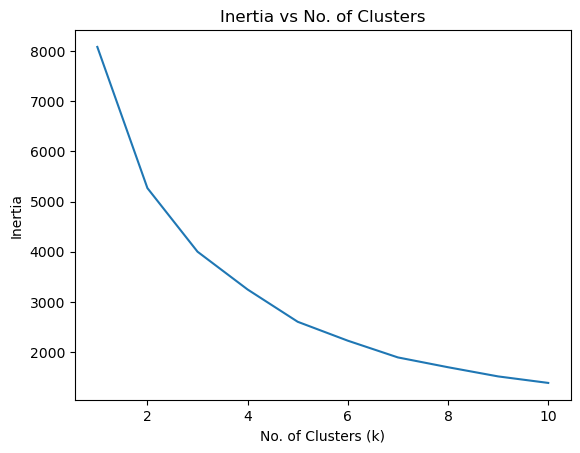

In [16]:
plt.plot(range(1, 11), inertia_list)
plt.title('Inertia vs No. of Clusters')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [17]:
model = KMeans(n_clusters = 4, random_state = 7)
model.fit(data_scaled[colms_to_cluster])
data_scaled['Cluster'] = model.predict(data_scaled[colms_to_cluster])

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[colms_to_cluster])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

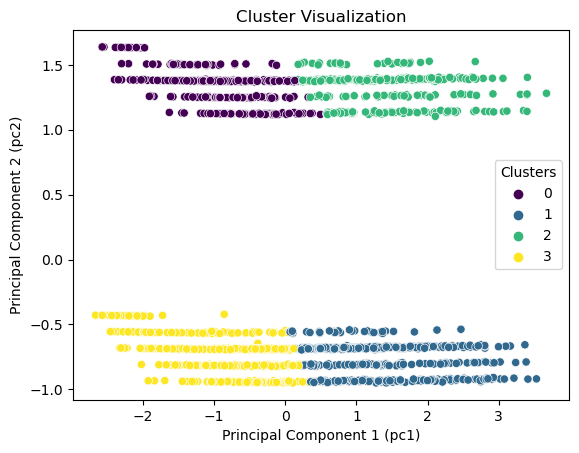

In [20]:
sns.scatterplot(x = 'pc1', y = 'pc2', data = data_scaled, hue = 'Cluster', palette = 'viridis')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title = 'Clusters')

plt.show()

In [21]:
customer_num = data_scaled.groupby('Cluster')['MntTotal'].count().reset_index()

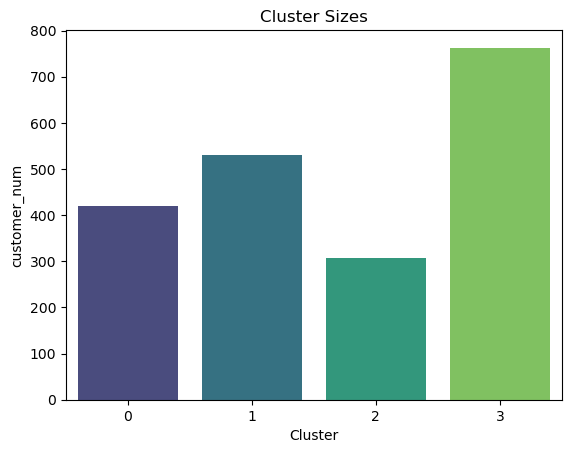

In [24]:
sns.barplot(x = "Cluster", y = 'MntTotal', data = customer_num, palette = 'viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('customer_num')

plt.show()

In [25]:
data_clustered = data.copy()

In [27]:
model.fit(data_clustered[colms_to_cluster])
data_clustered['Cluster'] = model.predict(data_clustered[colms_to_cluster])
data_clustered.head()

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,In_relationship,Education_status,Cluster
0,58138,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,0,3,1
1,46344,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,0,3,2
2,71613,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,1,3,3
3,26646,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,1,3,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,1,5,1


In [28]:
data_clustered['Avg_income'] = data_clustered.groupby('Cluster')['Income'].mean()

C:\Users\Home\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


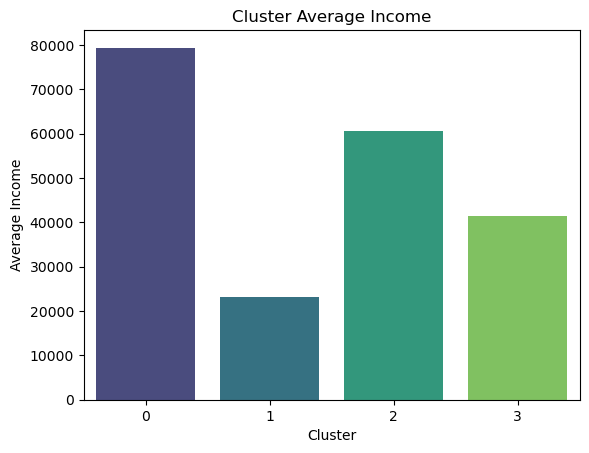

In [29]:
sns.barplot(x = "Cluster", y = 'Avg_income', data = data_clustered, palette = 'viridis')
plt.title('Cluster Average Income')
plt.xlabel('Cluster')
plt.ylabel('Average Income')

plt.show()

In [54]:
min_level_edu = data_clustered.groupby('Cluster')['Education_status'].min()

In [55]:
min_level_edu

Cluster
0    1
1    2
2    1
3    2
Name: Education_status, dtype: int64